In [1]:
import pandas as pd
data=pd.read_csv('./stocks_info_final_25.csv',index_col=0)
data.head()

,total_reads,counts,deltatime,density,RxD
2833,4502458.0,1920,20520.0,93.567251,4.212826e+08
2802,4517340.0,1920,22740.0,84.432718,3.814113e+08
603633,4273774.0,1920,22080.0,86.956522,3.716325e+08
600693,6354679.0,1920,45360.0,42.328042,2.689811e+08
600584,42342913.0,1922,363960.0,5.280800,2.236045e+08


In [2]:
print(data.describe())

total_reads       counts     deltatime      density           RxD
count  3.690000e+03  3690.000000  3.690000e+03  3690.000000  3.690000e+03
mean   2.696853e+06  1919.630894 -1.284165e+07     0.303600  5.990490e+05
std    1.565958e+06     3.807274  1.081628e+07     4.003593  1.830220e+07
min    8.122440e+05  1838.000000 -2.697096e+07  -155.177994 -7.367325e+08
25%    1.796348e+06  1920.000000 -2.270739e+07    -0.122269 -3.965921e+05
50%    2.306476e+06  1920.000000 -1.573998e+07    -0.084697 -1.840802e+05
75%    3.161860e+06  1920.000000 -4.097400e+05    -0.071209 -8.891131e+04
max    4.234291e+07  1925.000000  4.504200e+06    93.567251  4.212826e+08


In [3]:
idx=data.index.tolist()
idx=list(map(str,idx))
idx=list(map(lambda x : x.zfill(6),idx))
#print(idx[:20])
data.index=idx
data.head()

,total_reads,counts,deltatime,density,RxD
002833,4502458.0,1920,20520.0,93.567251,4.212826e+08
002802,4517340.0,1920,22740.0,84.432718,3.814113e+08
603633,4273774.0,1920,22080.0,86.956522,3.716325e+08
600693,6354679.0,1920,45360.0,42.328042,2.689811e+08
600584,42342913.0,1922,363960.0,5.280800,2.236045e+08


In [3]:
import tushare as ts
ts.set_token(r'1271fb1250f168b75ba0b4cb017370dbb22885fa387936ac1a60dca3')
pro = ts.pro_api()
stock_list = pro.stock_basic(exchange='', list_status='L', fields='symbol,name,market,industry')
stock_list.head()

,symbol,name,industry,market
0,000001,平安银行,银行,主板
1,000002,万科A,全国地产,主板
2,000004,国农科技,生物制药,主板
3,000005,世纪星源,环境保护,主板
4,000006,深振业A,区域地产,主板


In [135]:
stock_list.industry.value_counts()

软件服务    194
元器件     181
电气设备    172
化工原料    162
汽车配件    139
专用机械    137
通信设备    117
化学制药    103
建筑工程     88
医疗保健     83
环境保护     74
机械基件     73
互联网      70
中成药      69
电器仪表     65
区域地产     64
食品       61
半导体      56
服饰       56
塑料       47
生物制药     46
影视音像     46
百货       45
农药化肥     43
证券       43
家用电器     42
广告包装     41
家居用品     39
纺织       39
仓储物流     38
       ... 
其他商业     11
轻工机械     10
纺织机械     10
汽车服务     10
红黄酒      10
房产服务     10
化工机械     10
农用机械      9
酒店餐饮      9
电信运营      9
渔业        8
公共交通      8
石油加工      8
空运        8
船舶        8
特种钢       8
焦炭加工      7
公路        7
啤酒        7
批发业       7
摩托车       7
保险        7
石油贸易      6
陶瓷        6
软饮料       6
铁路        4
林业        4
机场        4
商品城       3
电器连锁      2
Name: industry, Length: 110, dtype: int64

In [136]:
#group=stock_list.groupby('market')
#lst=[ i for i in group]
#dct={}
#for i in lst:
#    dct[i[0]]=i[1].symbol.tolist()
#print(dct.keys())

stock_list.index=stock_list.symbol
print(stock_list.head())
print(stock_list.index)

symbol  name industry market
symbol                              
000001  000001  平安银行       银行     主板
000002  000002   万科A     全国地产     主板
000004  000004  国农科技     生物制药     主板
000005  000005  世纪星源     环境保护     主板
000006  000006  深振业A     区域地产     主板
Index(['000001', '000002', '000004', '000005', '000006', '000007', '000008',
       '000009', '000010', '000011',
       ...
       '688333', '688357', '688358', '688363', '688366', '688368', '688369',
       '688388', '688389', '688399'],
      dtype='object', name='symbol', length=3739)


In [137]:
combined=data.join(stock_list)
combined=combined.drop_duplicates()
print(combined.head())

total_reads  counts  deltatime    density           RxD  symbol  name  \
601318    1692091.0     399    31260.0  12.763916  2.159771e+07  601318  中国平安   
000725    1370011.0     400    25860.0  15.467904  2.119120e+07  000725  京东方A   
300277     341398.0     401     9360.0  42.841880  1.462613e+07  300277   海联讯   
000651     950150.0     398    27120.0  14.675516  1.394394e+07  000651  格力电器   
600093     916355.0     402    28800.0  13.958333  1.279079e+07  600093  易见股份   

       industry market  
601318       保险     主板  
000725      元器件     主板  
300277     软件服务    创业板  
000651     家用电器     主板  
600093     仓储物流     主板  


In [204]:
combined1=combined[['RxD','market','industry']]
combined1.reset_index(inplace=True)
combined1.columns=['id','RxD','market','industry']
combined1=combined1.dropna(how='any')
combined1=combined1.iloc[:200]
#print(combined1.head())
combined1=combined1.sort_values(by=["industry",'RxD'] , ascending=False)
#print(combined1)

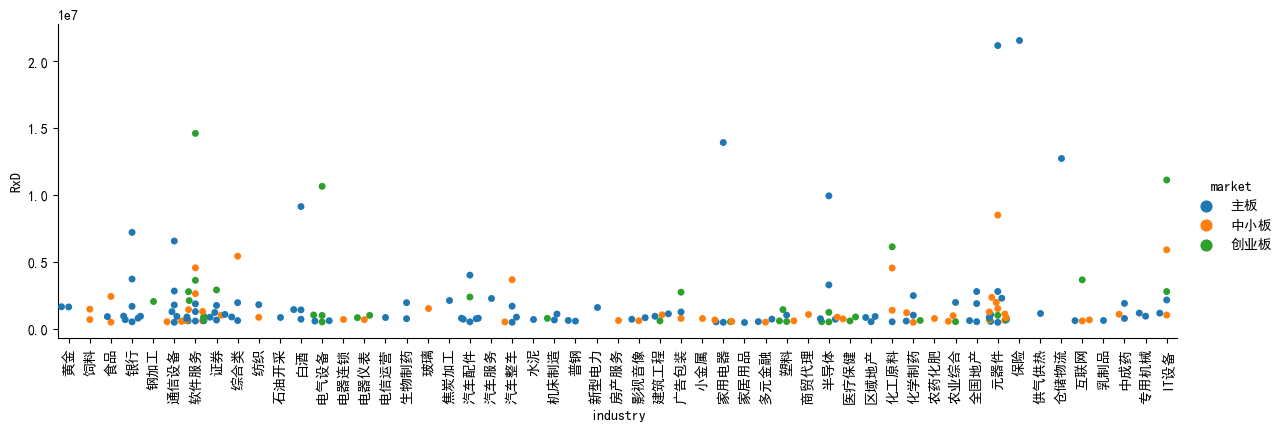

In [207]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#sns.reset_defaults()
plt.rcParams['font.sans-serif'] = ['SimHei']  # 解决中文显示问题-设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
#plt.figure(figsize=(40, 20))

sns.catplot(kind='swarm',x='industry',y='RxD',hue='market',data=combined1,height=4, aspect = 3)

plt.xticks(rotation=90)    # 将字体进行旋转
#plt.yticks(rotation=360)

plt.show()




<Figure size 2000x2000 with 0 Axes>

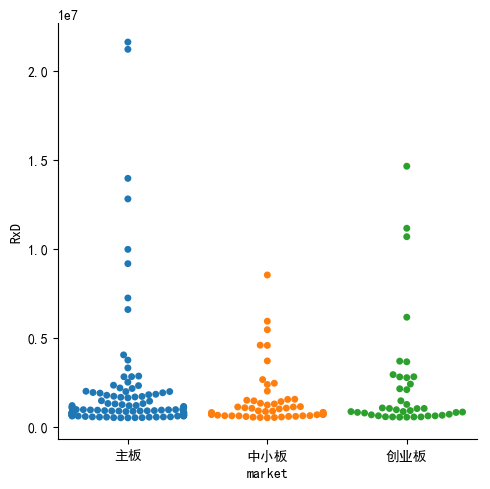

In [208]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#sns.reset_defaults()
plt.rcParams['font.sans-serif'] = ['SimHei']  # 解决中文显示问题-设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
plt.figure(figsize=(20, 20))

ax=sns.catplot(kind='swarm',x='market',y='RxD',data=combined1)




(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]), <a list of 53 Text xticklabel objects>)

<Figure size 2000x2000 with 0 Axes>

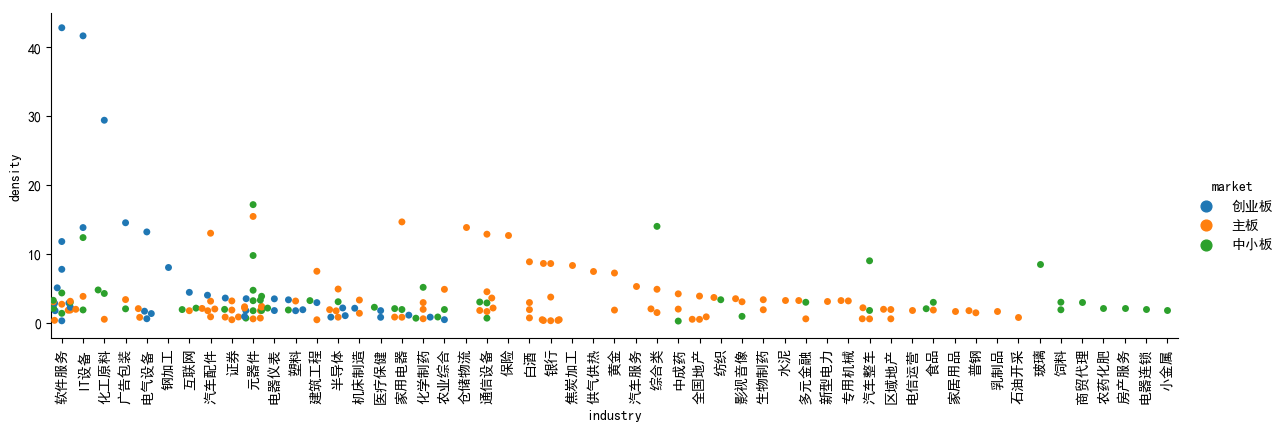

In [225]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#sns.reset_defaults()
plt.rcParams['font.sans-serif'] = ['SimHei']  # 解决中文显示问题-设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
plt.figure(figsize=(20, 20))

ax=sns.catplot(kind='swarm',x='industry',y='density',hue='market',data=combined1,height=4, aspect = 3)

plt.xticks(rotation=90)    # 将字体进行旋转

In [146]:
combined1=combined[['RxD','market','industry']]
combined1.reset_index(inplace=True)
combined1.columns=['id','RxD','market','industry']
combined1=combined1.dropna(how='any')
combined1=combined1.iloc[:100]
#print(combined1.head())
combined1=combined1.sort_values(by=["market",'RxD'] , ascending=False)
print(combined1)

id           RxD market industry
2    300277  1.462613e+07    创业板     软件服务
5    300793  1.114200e+07    创业板     IT设备
6    300341  1.066809e+07    创业板     电气设备
12   300801  6.147807e+06    创业板     化工原料
20   300431  3.679607e+06    创业板      互联网
21   300598  3.643576e+06    创业板     软件服务
23   300059  2.923555e+06    创业板       证券
26   300802  2.803100e+06    创业板     IT设备
28   300803  2.794105e+06    创业板     软件服务
29   300805  2.753697e+06    创业板     广告包装
34   300643  2.393952e+06    创业板     汽车配件
40   300799  2.128914e+06    创业板     软件服务
41   300345  2.079403e+06    创业板      钢加工
61   300806  1.453633e+06    创业板       塑料
71   300223  1.250086e+06    创业板      半导体
85   300014  1.051720e+06    创业板     电气设备
90   300797  1.024558e+06    创业板     电器仪表
91   300748  1.023786e+06    创业板      元器件
92   300750  1.017073e+06    创业板     电气设备
98   300249  9.513151e+05    创业板     软件服务
0    601318  2.159771e+07     主板       保险
1    000725  2.119120e+07     主板      元器件
3    000651  1.394394e+07     主板     家用电器
4

In [223]:
combined1=combined[['density','market','industry']]
combined1.reset_index(inplace=True)
combined1.columns=['id','density','market','industry']
combined1=combined1.dropna(how='any')
combined1=combined1.iloc[:200]
#print(combined1.head())
combined1=combined1.sort_values(by=["market",'density'] , ascending=False)
print(combined1)

id    density market industry
2    300277  42.841880    创业板     软件服务
5    300793  41.666667    创业板     IT设备
12   300801  29.424779    创业板     化工原料
29   300805  14.551422    创业板     广告包装
26   300802  13.854167    创业板     IT设备
6    300341  13.221785    创业板     电气设备
21   300598  11.828909    创业板     软件服务
41   300345   8.090024    创业板      钢加工
28   300803   7.797271    创业板     软件服务
40   300799   5.110603    创业板     软件服务
20   300431   4.454891    创业板      互联网
34   300643   4.041026    创业板     汽车配件
23   300059   3.629829    创业板       证券
91   300748   3.533475    创业板      元器件
90   300797   3.514321    创业板     电器仪表
61   300806   3.373717    创业板       塑料
167  300564   2.966919    创业板     建筑工程
145  300300   2.909011    创业板     软件服务
118  300168   2.877542    创业板     软件服务
117  300352   2.293315    创业板     软件服务
71   300223   2.190382    创业板      半导体
124  300809   2.152800    创业板     机床制造
180  300221   1.936396    创业板       塑料
115  300370   1.814277    创业板     电器仪表
123  300088   1.807664    创业板     

In [5]:
print(list(range(0,11,5)))

[0, 5, 10]
